In [2]:
import festim as F
import numpy as np
import sympy as sp
from festim import x,y,z,t

In [3]:
T_b = 975#K
t_res = 1000#s
r_p = 3e-2#m
S = 1.715e17
g_atom_density = 1.1e29
Cinf = 1e23 #concentration at infinity
my_model = F.Simulation()
size = 3.5e-2

In [4]:
t = np.arange(0,t_res,10)
x = np.arange(0,size,size/100)
vertices_g = np.linspace(0,r_p, num = 100)
vertices_lipb = np.linspace(r_p,size, num = 100)
vertices = np.concatenate([vertices_g, vertices_lipb])
my_model.mesh = F.MeshFromVertices(vertices, type = 'spherical')

graphite = F.Material(
    id=1,
    D_0= 1.16e-6,
    E_D= 3.51e-2,
    borders=[0, r_p],
    solubility_law= "henry"
)
lipb = F.Material(
    id=2,
    D_0= 7.88e-8,
    E_D= 1.64e-1,
    borders=[r_p, size],
)

my_model.materials = F.Materials([graphite, lipb])

my_model.T = F.Temperature(value=T_b)

In [5]:
my_model.boundary_conditions = [
    F.DirichletBC(surfaces=2, value=Cinf, field=0)
]

In [6]:
my_model.sources = [F.Source(value=S, volume=2, field=0)]
#my_model.sources = [F.InitialCondition(field='mobile', value=F.x)]
my_model.settings = F.Settings(
    absolute_tolerance=1e10,
    relative_tolerance=1e-10,
    final_time=500 # s
    )
my_model.dt = F.Stepsize(2)  # s
results_folder = "task01"
my_model.exports = [
    F.XDMFExport(
        field="solute",
        filename=results_folder + "/hydrogen_concentration.xdmf",
        checkpoint=False  # needed in 1D
        ),
    F.TXTExport(field="solute", times=t.tolist(), filename=results_folder+"/mobile_concentration.txt")
]
my_model.initialise()

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions


/home/solomon/.local/lib/python3.10/site-packages/festim/generic_simulation.py:334: UserWarning: To ensure that TXTExport exports data at the desired times TXTExport.times are added to milestones
  warnings.warn(msg)


In [7]:
my_model.run()

Time stepping...
100.0 %        5.0e+02 s    Ellapsed time so far: 26.4 s


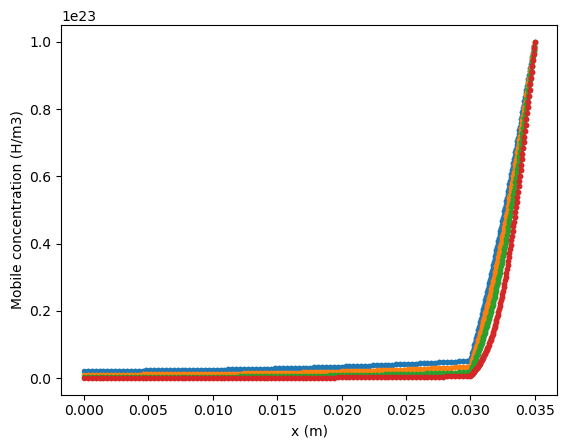

In [9]:
import matplotlib.pyplot as plt
import numpy as np

data = np.genfromtxt(
    results_folder + "/mobile_concentration.txt", skip_header=1, delimiter=","
)


plt.plot(data[:, 0], data[:, 50], label="1.0 s", marker = '.')
plt.plot(data[:, 0], data[:, 40], label="0.5 s", marker = '.')
plt.plot(data[:, 0], data[:, 30], label="0.2 s", marker = '.')
plt.plot(data[:, 0], data[:, 20], label="0.1 s", marker = '.')
plt.xlabel("x (m)")
plt.ylabel("Mobile concentration (H/m3)")
plt.show()